<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/2_Data_Analysis_of_merged_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Data analysis and EDA

---

#### Load Libraries

In [2]:

!pip install tensorflow
!pip install scikeras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore')

# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [ ]:
# Get the files from GitHub raw URLs for the datasets
# dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Datasetv2.csv'
# property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data sets
# dataset = pd.read_csv(dataset_url)
# property_dataset = pd.read_csv(property_dataset_url)

In [4]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Merged_Datasetv2.csv'

# Load the CSV file into a pandas DataFrame called "merged_dataset"
merged_dataset = pd.read_csv(file_path)

# Display information about the DataFrame
print("\nDataset Info:")
merged_dataset.info()  # Information about columns, data types, and memory usage

# Display the shape of the DataFrame
print("\nDataset Shape:")
print(f"Rows: {merged_dataset.shape[0]}, Columns: {merged_dataset.shape[1]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 63 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             109851 non-null  int64  
 1   unit_rate                                       109851 non-null  int64  
 2   district                                        109851 non-null  object 
 3   floor                                           109851 non-null  float64
 4   FormattedDate                                   109851 non-null  object 
 5   YearQuarter                                     109851 non-null  object 
 6   CG                                              109851 non-null  float64
 7   CI                                    

### DATA ANALYSIS OF HONG KONG PROPERTY MARKET


### Properties sold per quarter from `Property data  raw 2.csv`


In [5]:
# Load the file and Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Property_data_raw_2.csv'

# Load the CSV file into a pandas DataFrame called "Property_data_raw.csv"
Property_data_raw_2 = pd.read_csv(file_path)

# Display the shape of the DataFrame
print("\nDataset Shape:")
Property_data_raw_2.shape
Property_data_raw_2.head(20)


Dataset Shape:


,Unnamed: 0,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4
0,CPI,0.80,0.80,0.80,0.80,0.90,0.90,0.90,0.90,1.80,1.80,1.80,1.80,2.00,2.00,2.00,2.00
1,IR,2.00,0.86,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,2.00,3.50,4.75,5.50,5.75,5.75
2,MW,17.00,17.00,17.10,16.90,16.80,17.00,17.20,17.20,17.10,17.30,17.50,17.60,17.70,18.00,18.30,18.40
3,M3,14.80,14.90,15.90,15.60,15.90,16.00,16.00,16.20,16.50,16.30,16.30,16.40,16.50,16.50,16.80,17.10
4,SD,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.08,0.08,0.08,0.08,0.08
5,UR,3.70,5.90,6.20,6.20,7.20,6.00,4.60,4.10,4.50,5.10,4.10,3.70,3.30,3.00,2.90,2.90
6,GDP,86.24,86.24,86.24,86.24,92.23,92.23,92.23,92.23,89.96,89.96,89.96,89.96,91.40,91.40,91.40,91.40
7,CI,62.90,52.30,59.80,63.80,66.60,66.80,68.00,63.40,50.60,53.70,43.90,28.30,66.10,61.00,52.60,51.00
8,SM,27.90,24.20,25.10,26.50,28.90,29.10,24.80,23.99,21.91,20.72,17.75,19.90,20.58,19.45,17.95,17.45
9,LTV,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50


In [6]:
# Ensure the first column is correctly labeled
Property_data_raw_2.rename(columns={Property_data_raw_2.columns[0]: 'named'}, inplace=True)

# Extract the "SOLD" row
sold_row = Property_data_raw_2[Property_data_raw_2['named'] == 'SOLD']

# Drop the last three quarters: 2023Q2, 2023Q3, 2023Q4
sold_row_filtered = sold_row.loc[:, '2020Q1':'2023Q1']

# Convert the filtered row to numeric for summation
sold_row_filtered = sold_row_filtered.apply(pd.to_numeric, errors='coerce')

# Calculate the total SOLD properties
total_sold = sold_row_filtered.sum(axis=1).values[0]

# Get the total number of rows in merged_dataset (excluding the first row)
total_rows = merged_dataset.shape[0] - 1  # Exclude the first row

# Calculate the percentage of total rows compared to SOLD properties
percentage_total_rows = (total_rows / total_sold) * 100

# Print the results
print(f"Total SOLD properties (excluding 2023Q2, 2023Q3, 2023Q4): {total_sold}")
print(f"Total rows in merged_dataset (excluding the first row): {total_rows}")
print(f"Percentage of total properties in the merged_dataset from Centerline compared to SOLD properties in Govt Statistics: {percentage_total_rows:.2f}%")

Total SOLD properties (excluding 2023Q2, 2023Q3, 2023Q4): 243585.0
Total rows in merged_dataset (excluding the first row): 109850
Percentage of total properties in the merged_dataset from Centerline compared to SOLD properties in Govt Statistics: 45.10%


Based on the above, the number of properties recorded as sold by Govt is `243,585` but the Centreline property only recorded `111370` in the same period, so it does not record ALL the property transactions in that period

### Distribution of Sold Private Properties from the `Merged_Datasetv2.csv`

In [7]:
#Central line
merged_dataset.groupby('YearQuarter')['unit_rate'].count()

,unit_rate
YearQuarter,
2020Q1,192
2020Q2,1276
2020Q3,1609
2020Q4,1633
2021Q1,2689
2021Q2,5645
2021Q3,7828
2021Q4,8934
2022Q1,6534


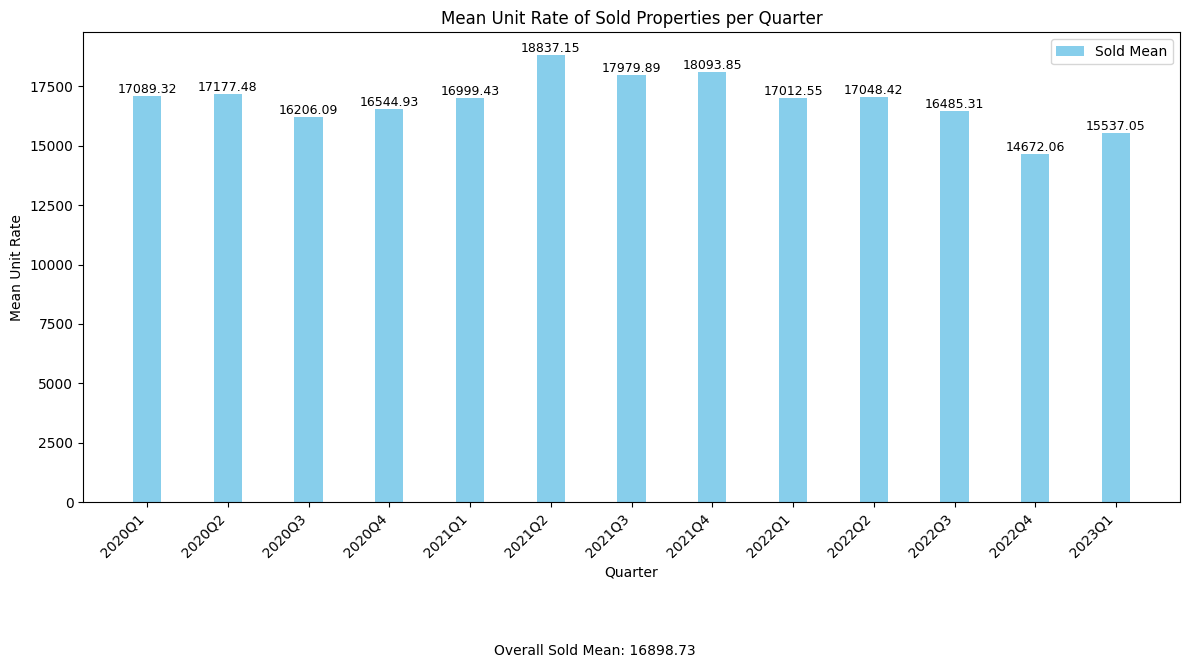

In [8]:
# Group by YearQuarter and calculate mean of unit rates
sold_mean = merged_dataset.groupby('YearQuarter')['unit_rate'].mean()

# Create a DataFrame for the mean unit rates
unit_rates_summary = pd.DataFrame({
    'Sold Mean': sold_mean
}).fillna(0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
index = np.arange(len(unit_rates_summary))

# Plot the bars
bar1 = ax.bar(index, unit_rates_summary['Sold Mean'], bar_width, label='Sold Mean', color='skyblue')

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Mean Unit Rate')
ax.set_title('Mean Unit Rate of Sold Properties per Quarter')

# Set the x-ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(unit_rates_summary.index.astype(str), rotation=45, ha='right')

# Adding a legend
ax.legend()

# Display mean values as numbers on the bars
for i in range(len(index)):
    ax.text(index[i], unit_rates_summary['Sold Mean'][i] + 0.01,
            f'{unit_rates_summary["Sold Mean"][i]:.2f}',
            ha='center', va='bottom', fontsize=9)

# Calculate the overall mean
sold_overall_mean = sold_mean.mean()

# Display overall average below the graph
plt.figtext(0.5, -0.1, f"Overall Sold Mean: {sold_overall_mean:.2f}", ha='center', fontsize=10)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

## Properties sold by size

In [9]:
merged_dataset.groupby(['YearQuarter', 'property_size']).size().unstack()
#.size().unstack(fill_value=0)

property_size,Large,Medium,Small,Very Large
YearQuarter,,,,
2020Q1,11,78,97,6
2020Q2,82,471,667,56
2020Q3,96,730,718,65
2020Q4,111,773,685,64
2021Q1,206,1093,1296,94
2021Q2,336,2540,2603,166
2021Q3,382,3196,4068,182
2021Q4,383,3280,5066,205
2022Q1,292,2834,3259,149


<Figure size 1200x1000 with 0 Axes>

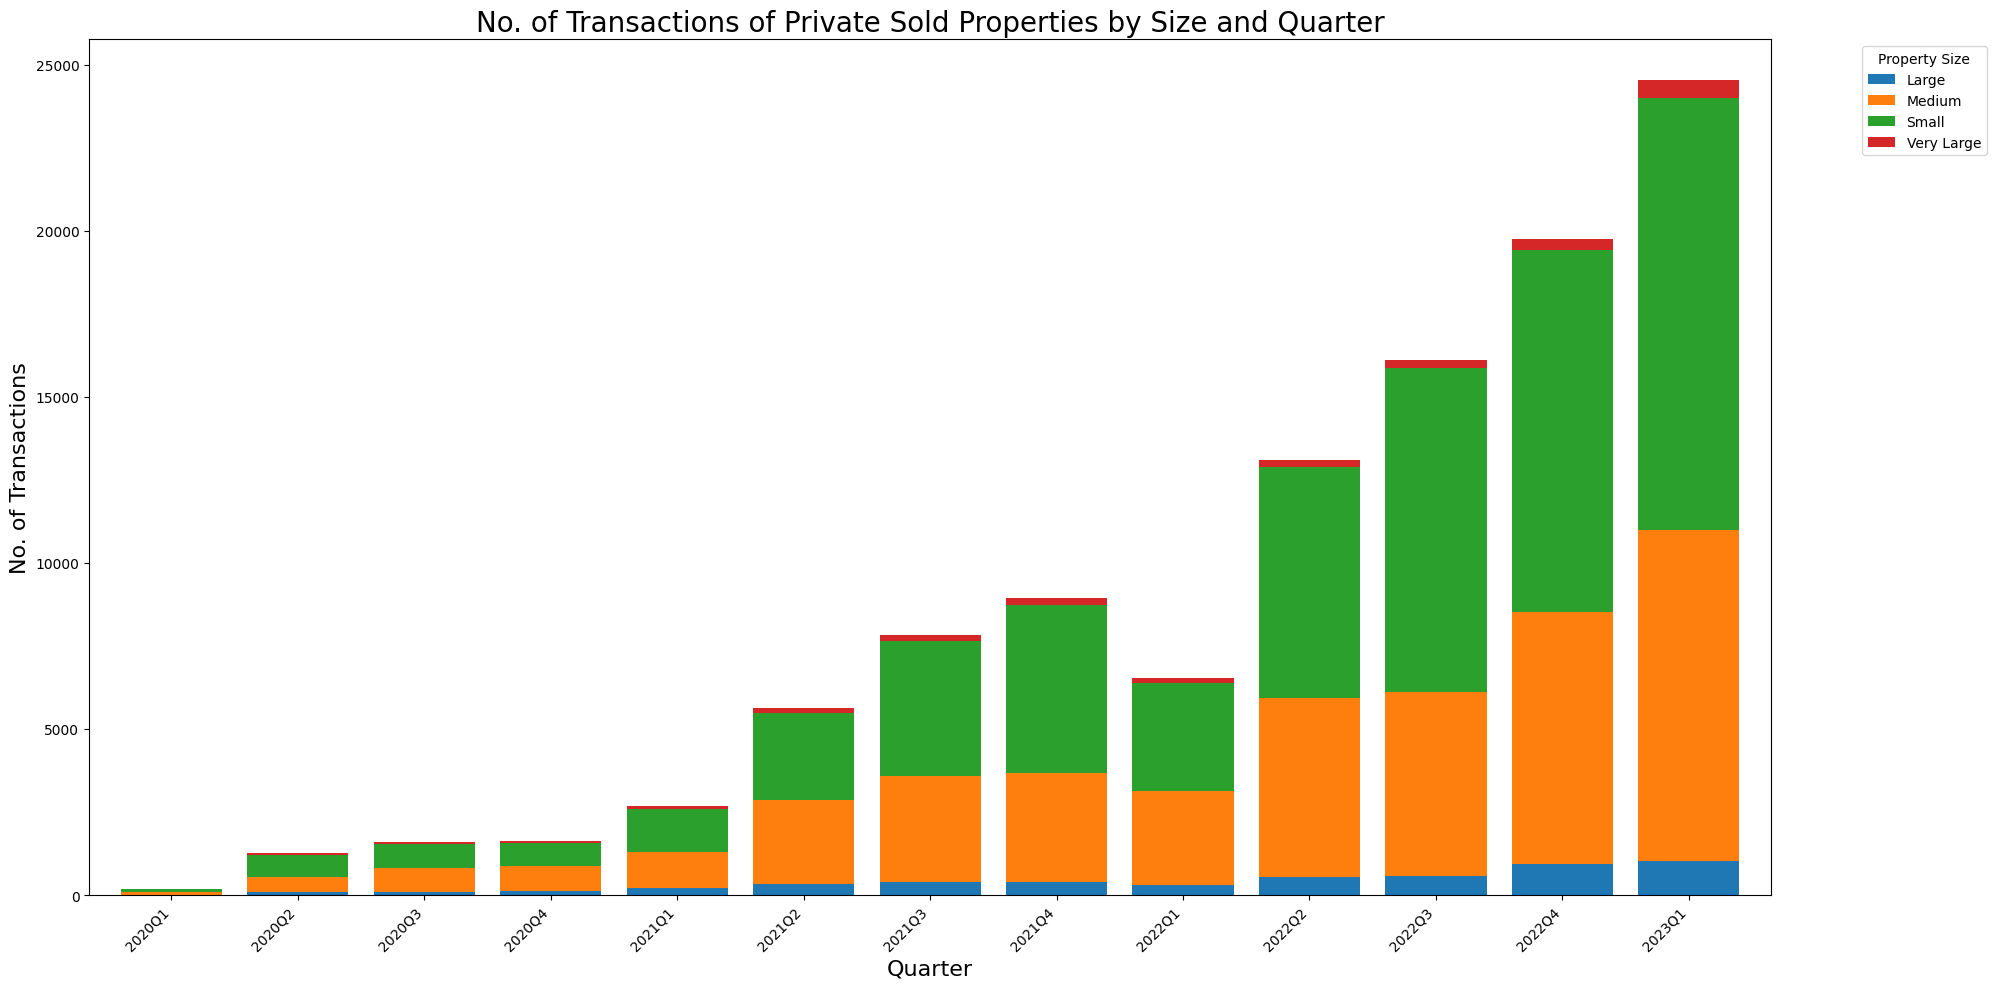

In [10]:
# Group by YearQuarter and property_size, then count transactions
transaction_counts = merged_dataset.groupby(['YearQuarter', 'property_size']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 10))  # Increased figure width
ax = transaction_counts.plot(kind='bar', stacked=True, figsize=(20, 10), width=0.8)  # Increased bar width

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by Size and Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('No. of Transactions', fontsize=16)
plt.legend(title='Property Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show();

## Consider property size and unit rate for sold properties.

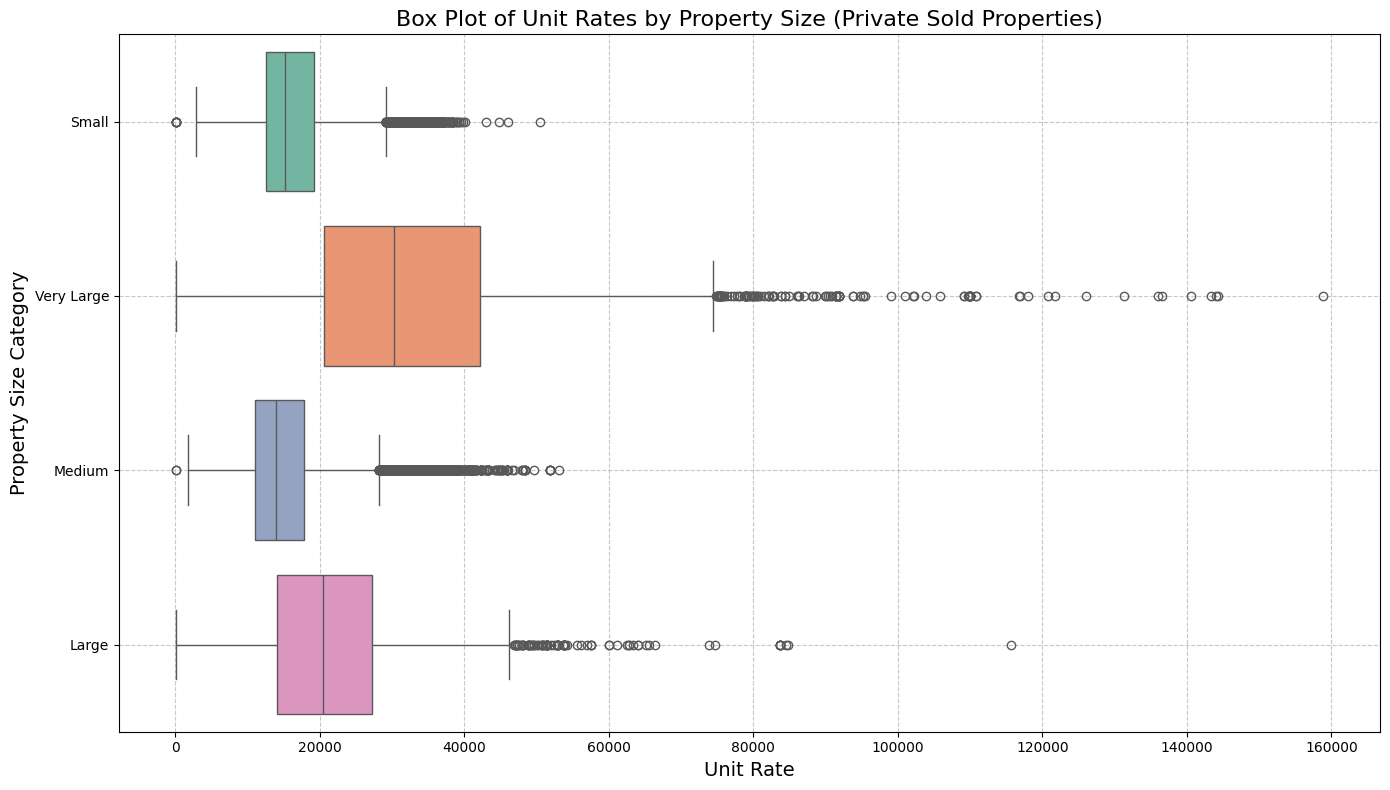

In [11]:
# Plotting the box plot with updated syntax for future compatibility
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Replace 'private_sold' with 'merged_dataset'
sns.boxplot(x='unit_rate', y='property_size', data=merged_dataset, palette='Set2', hue=None, dodge=False)

# Customizing the plot
plt.title('Box Plot of Unit Rates by Property Size (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=14)
plt.ylabel('Property Size Category', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Mean Unit rate price per square foot Movement of Sold Property Sizes by Quarter

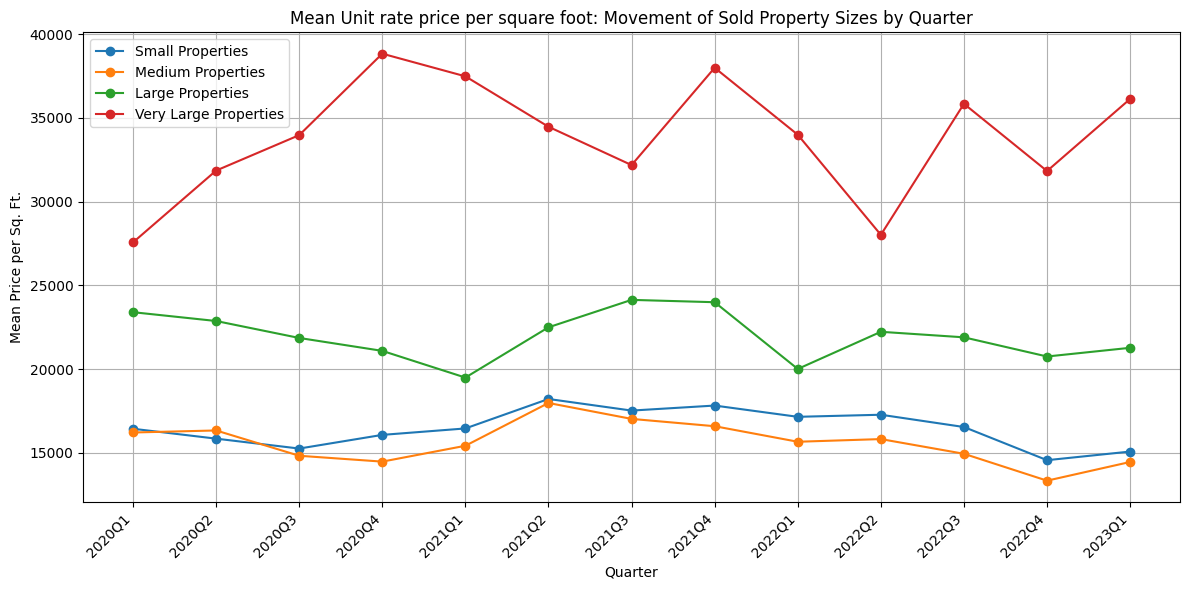

In [12]:
# Group by YearQuarter and property size, then calculate the mean unit rate
private_sold_rate_by_size = merged_dataset.groupby(['YearQuarter', 'property_size'])['unit_rate'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Plot the mean unit rate for each property size category
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Small'], label='Small Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Medium'], label='Medium Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Large'], label='Large Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Very Large'], label='Very Large Properties', marker='o')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Mean Price per Sq. Ft.')
plt.title('Mean Unit rate price per square foot: Movement of Sold Property Sizes by Quarter')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Distribution of Unit Rates by District

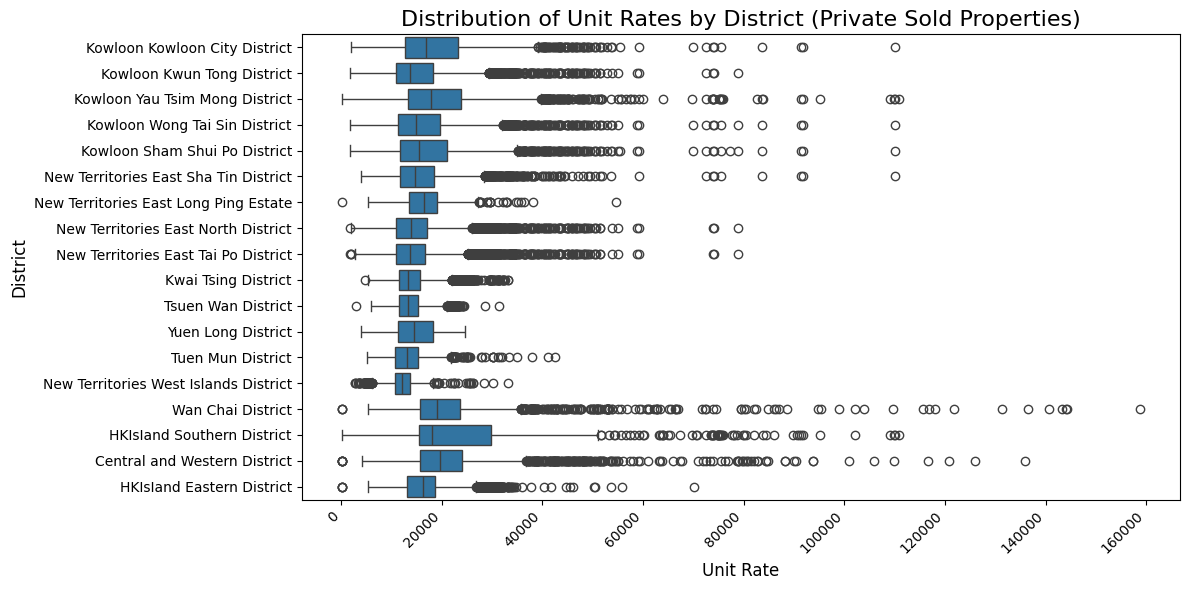

In [13]:
# Plotting box plot for merged_dataset (replace private_sold with merged_dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='district', data=merged_dataset)

# Customize the plot
plt.title('Distribution of Unit Rates by District (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Unit Rates by Region

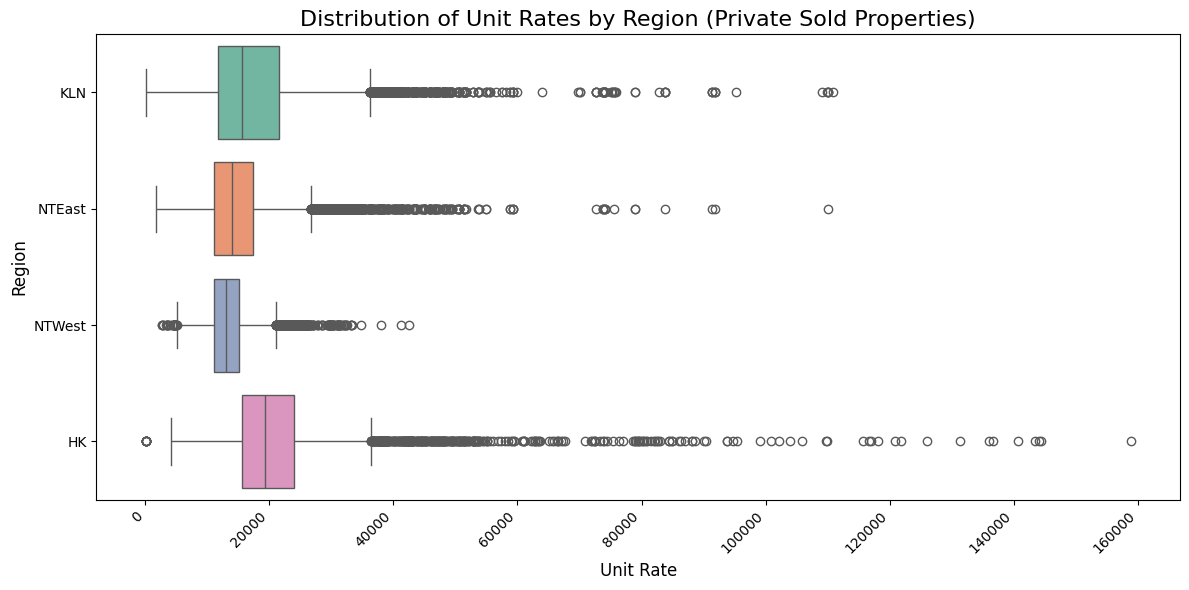

In [14]:
# Plotting box plot for private sold properties by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')

# Customize the plot
plt.title('Distribution of Unit Rates by Region (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## Number of transactions in the districts for each yearly quarter

<Figure size 1200x600 with 0 Axes>

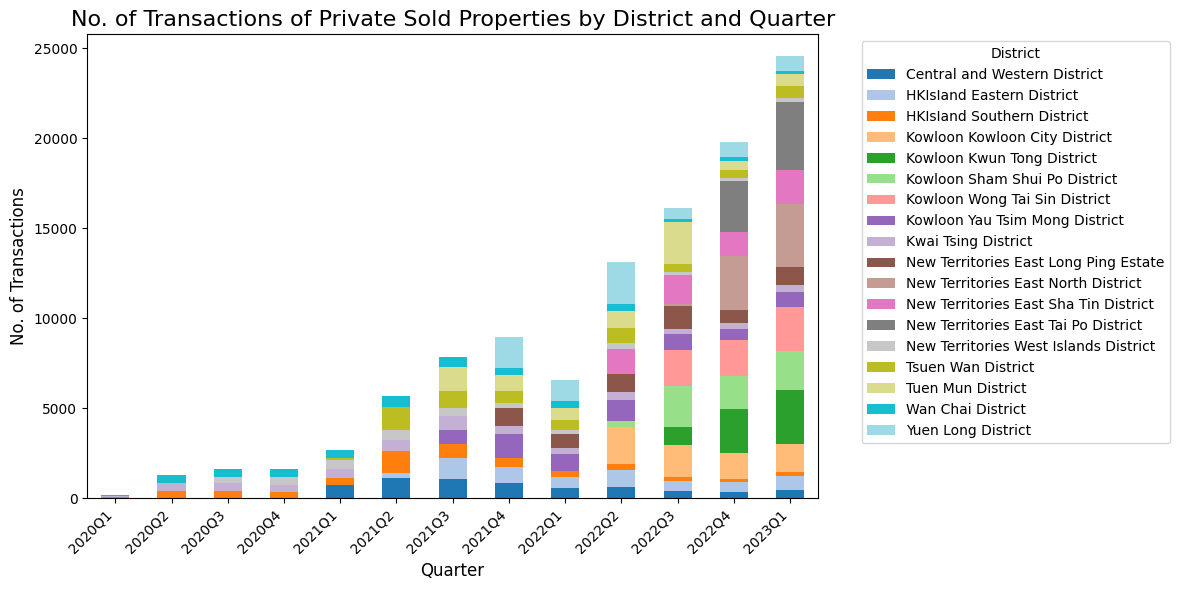

In [15]:
# Group by YearQuarter and district, then count transactions
tcount_sold_by_district = merged_dataset.groupby(['YearQuarter', 'district']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
tcount_sold_by_district.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by District and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## More EDA for reporting

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Beautify matplotlib plots using rcParams
plt.rcParams.update({
    'figure.figsize': (10, 6),             # Set figure size
    'axes.titlesize': 16,                  # Title font size
    'axes.titleweight': 'bold',             # Title font weight
    'axes.labelsize': 14,                  # Axis label font size
    'axes.labelweight': 'bold',             # Axis label font weight
    'axes.grid': True,                     # Show grid
    'grid.alpha': 0.3,                     # Grid transparency
    'grid.linestyle': '--',                # Grid line style
    'xtick.labelsize': 12,                 # X-axis tick label font size
    'ytick.labelsize': 12,                 # Y-axis tick label font size
    'legend.fontsize': 12,                 # Legend font size
    'legend.loc': 'best',                  # Best location for the legend
    'font.family': 'serif',                # Font family
    'font.serif': ['Times New Roman'],     # Serif font for better readability
    'axes.facecolor': '#f0f0f0',           # Background color of the axes
    'figure.facecolor': 'white',           # Background color of the figure
    'savefig.dpi': 300,                    # Resolution of saved figure
    'savefig.transparent': True            # Transparent background for saved figure
})

# Use seaborn's default style for extra improvement
sns.set(style="whitegrid", palette="muted")


###_ Histogram for Saleable Area

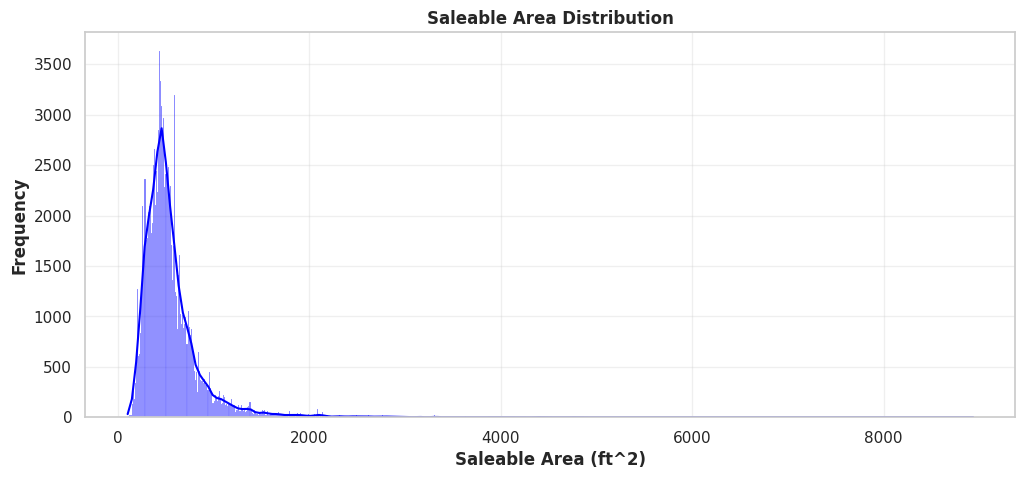

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(merged_dataset['saleable_area(ft^2)'], kde=True, color='blue')
plt.title('Saleable Area Distribution')
plt.xlabel('Saleable Area (ft^2)')
plt.ylabel('Frequency')
plt.show()

### Boxplot for Saleable Area

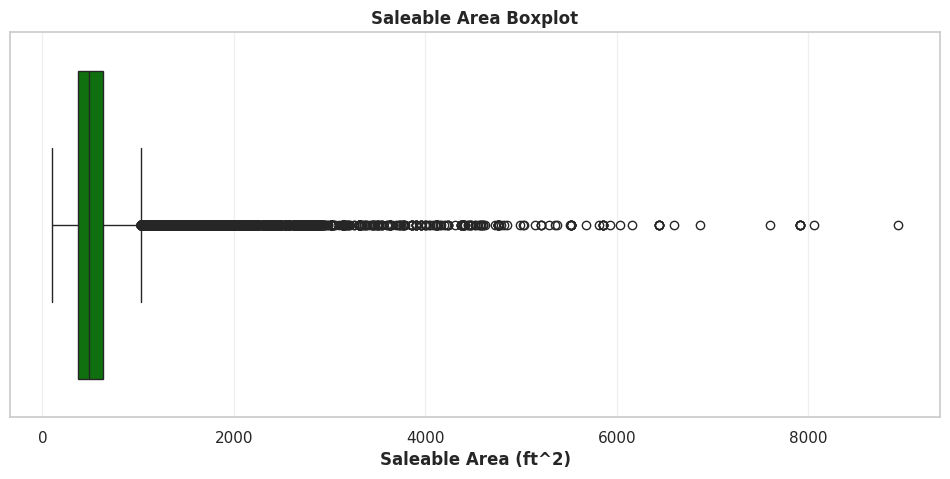

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=merged_dataset['saleable_area(ft^2)'], color='green')
plt.title('Saleable Area Boxplot')
plt.xlabel('Saleable Area (ft^2)')
plt.show()

### Density Plot for Unit Rate

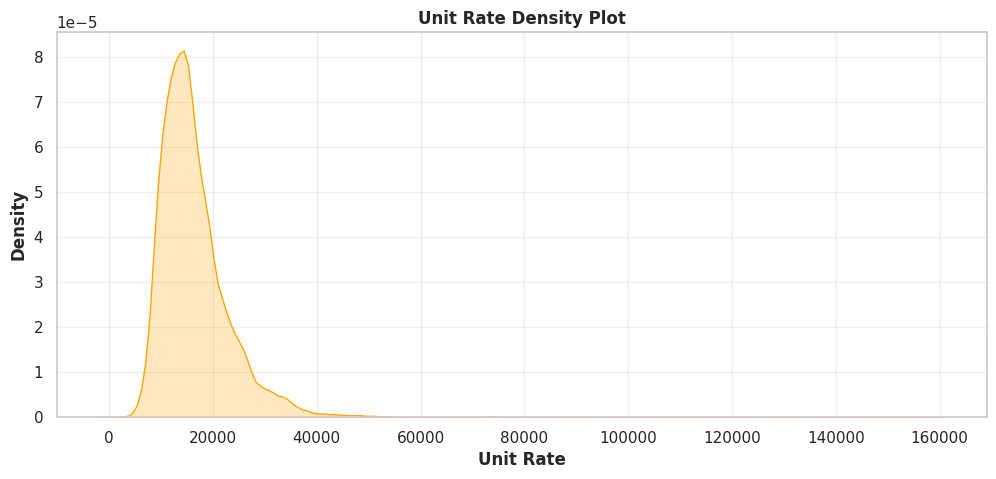

In [19]:
plt.figure(figsize=(12, 5))
sns.kdeplot(merged_dataset['unit_rate'], shade=True, color='orange')
plt.title('Unit Rate Density Plot')
plt.xlabel('Unit Rate')
plt.ylabel('Density')
plt.show()

### Pairplot for Continuous Variables

<Figure size 1500x1500 with 0 Axes>

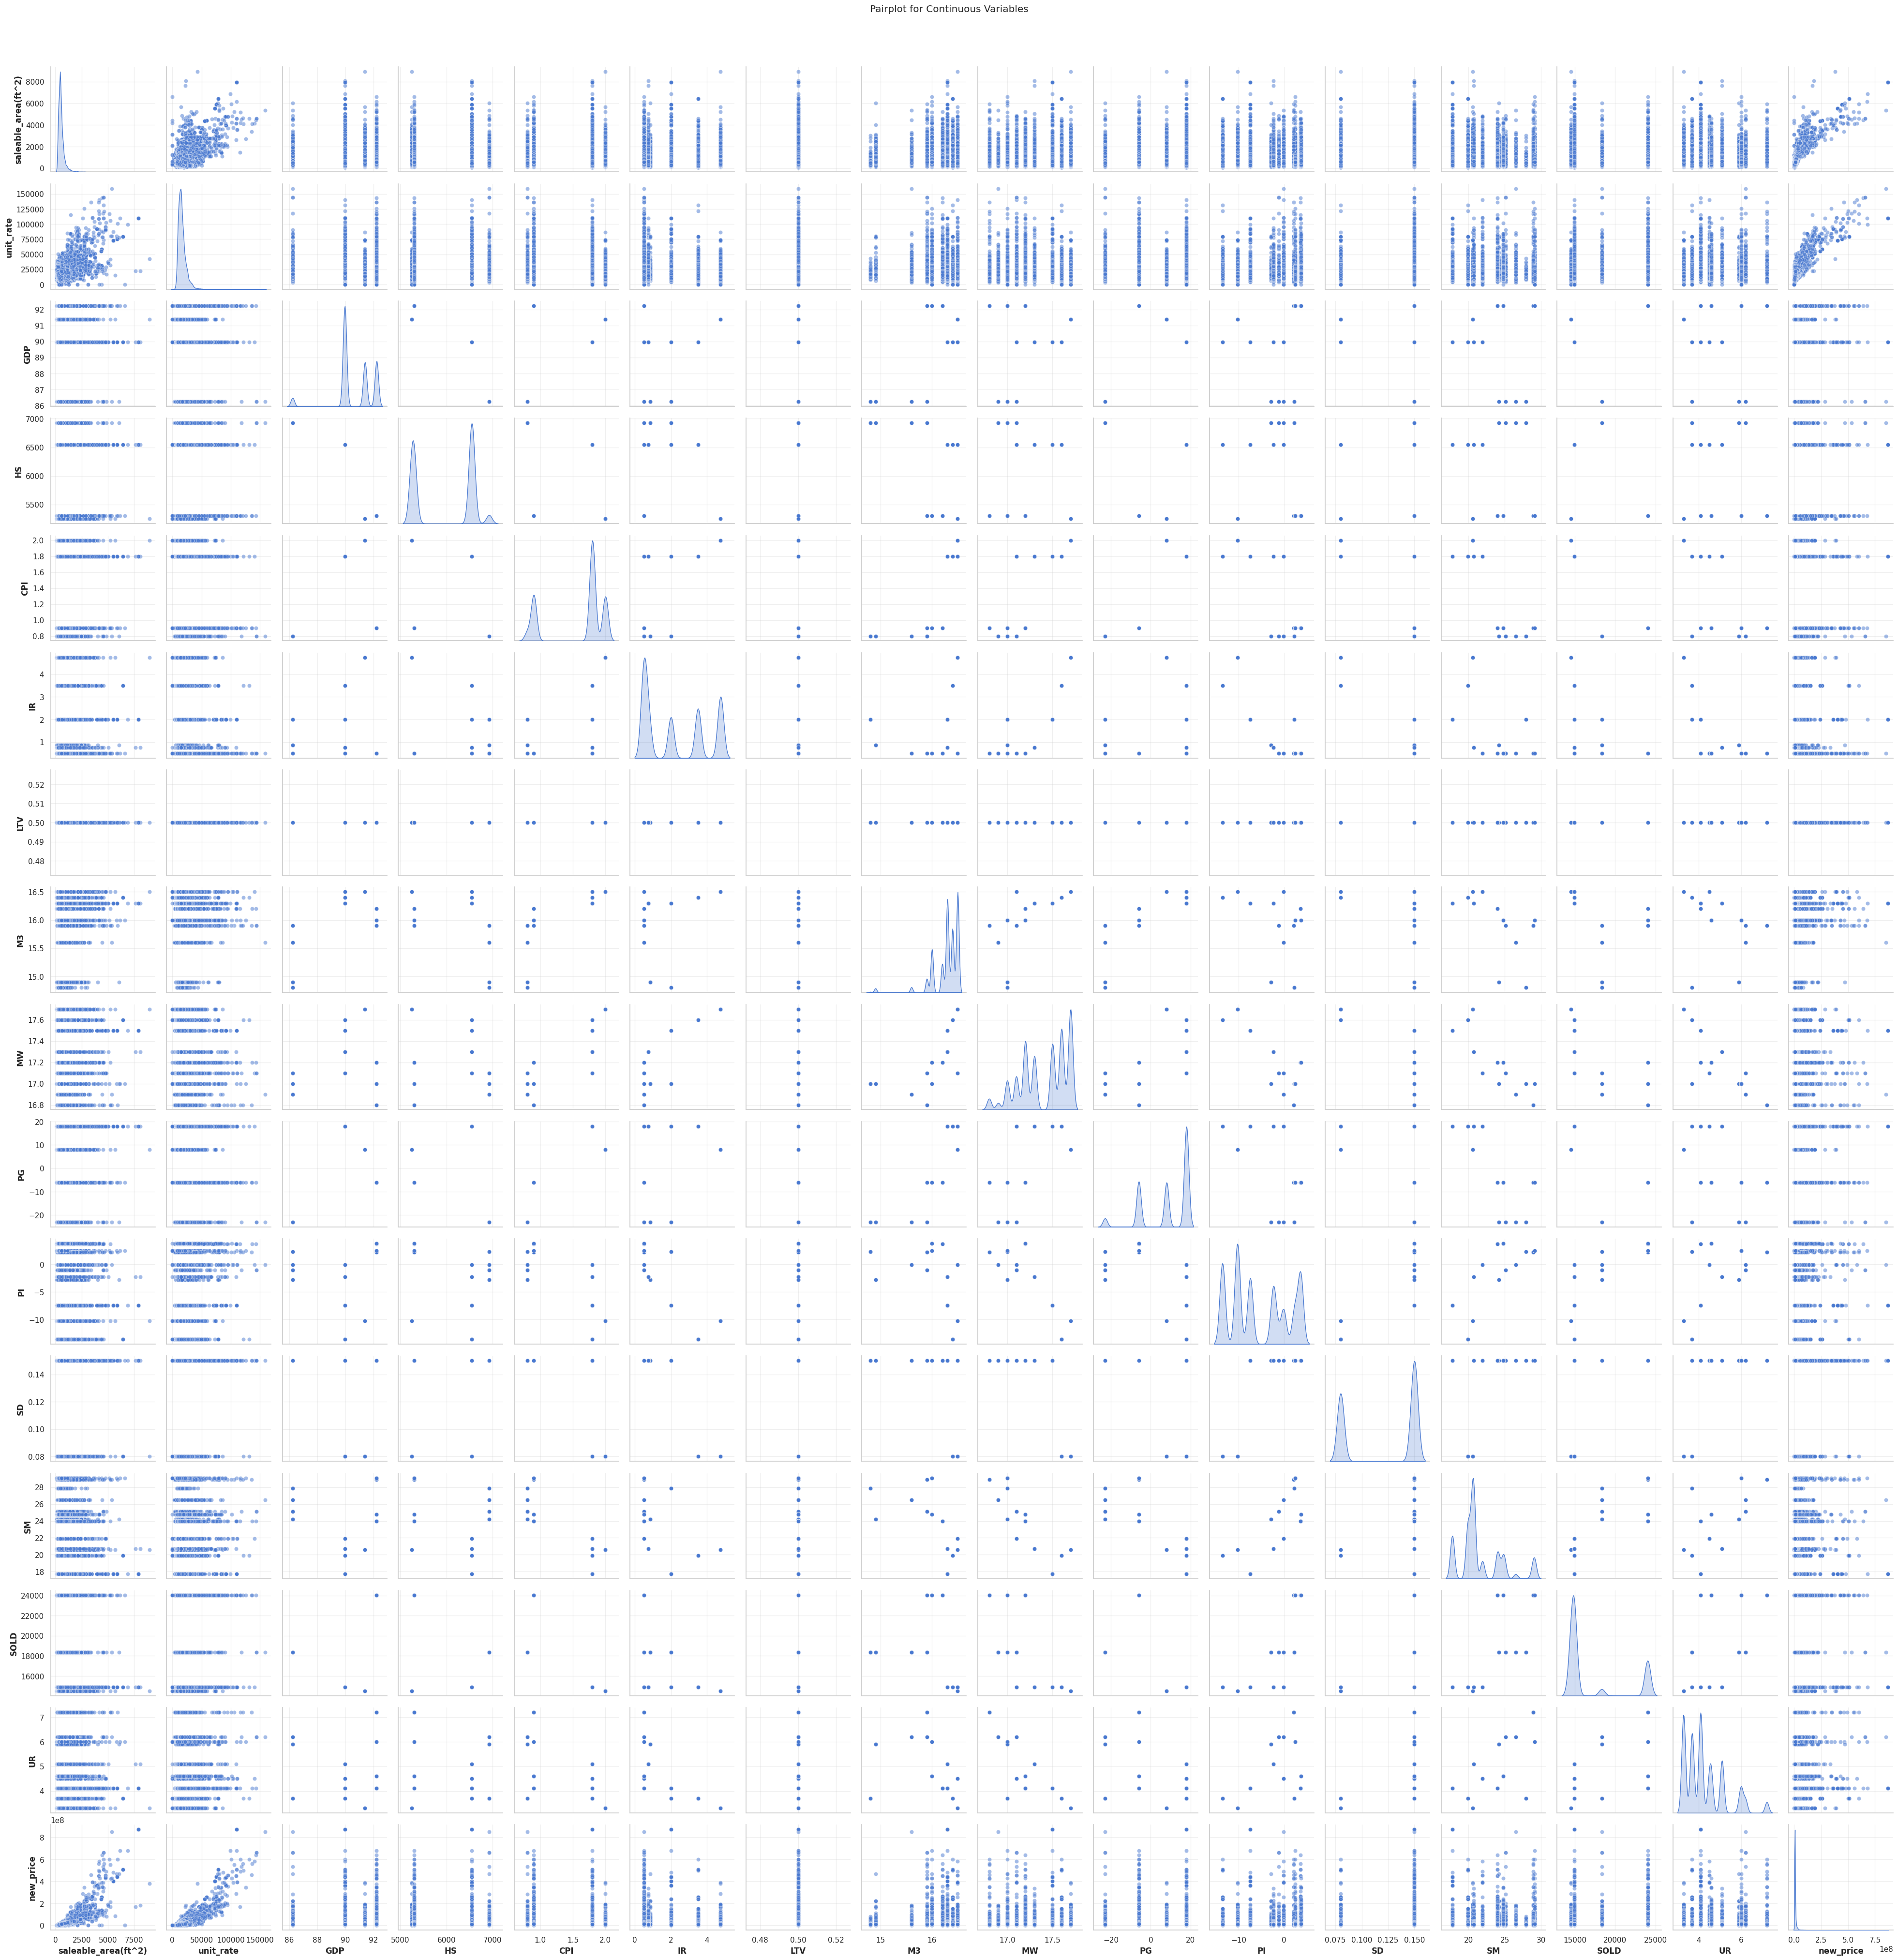

In [20]:
plt.figure(figsize = (15,15))
continuous_cols = ['saleable_area(ft^2)', 'unit_rate', 'GDP', 'HS', 'CPI', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR', 'new_price']
sns.pairplot(merged_dataset[continuous_cols], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot for Continuous Variables', y=1.02)
plt.show()

# Bivariate Visualizations

### Scatter Plot of Saleable Area vs Unit Rate

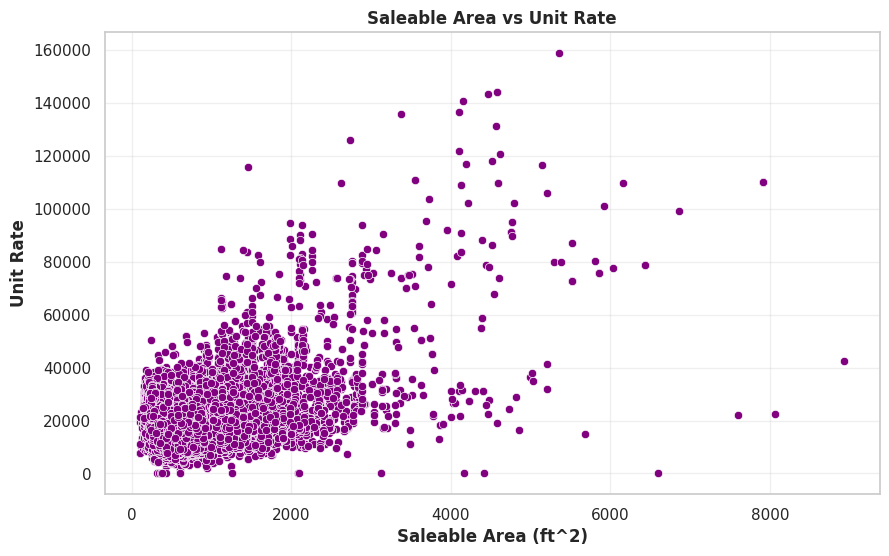

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_dataset['saleable_area(ft^2)'], y=merged_dataset['unit_rate'], color='purple')
plt.title('Saleable Area vs Unit Rate')
plt.xlabel('Saleable Area (ft^2)')
plt.ylabel('Unit Rate')
plt.show()

### Scatter Plot of Floor vs Saleable Area


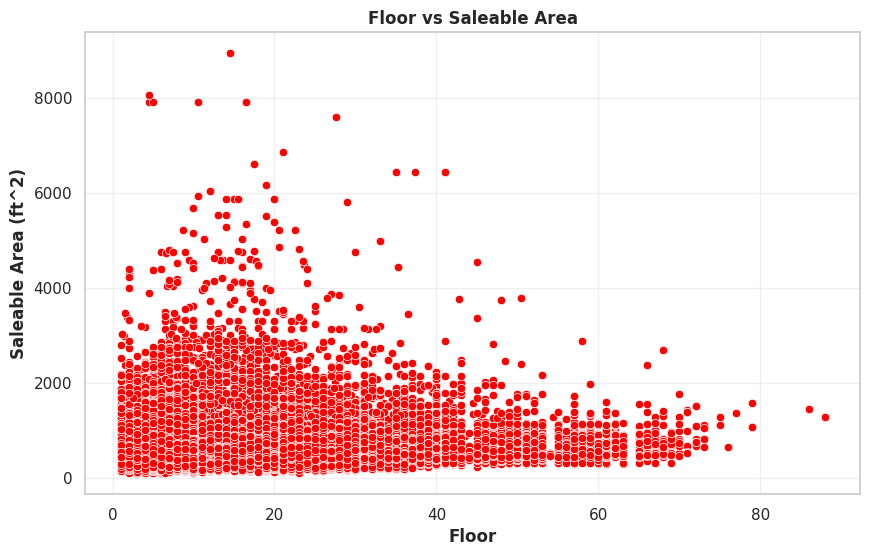

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_dataset['floor'], y=merged_dataset['saleable_area(ft^2)'], color='red')
plt.title('Floor vs Saleable Area')
plt.xlabel('Floor')
plt.ylabel('Saleable Area (ft^2)')
plt.show()

### Boxplot by Property Size

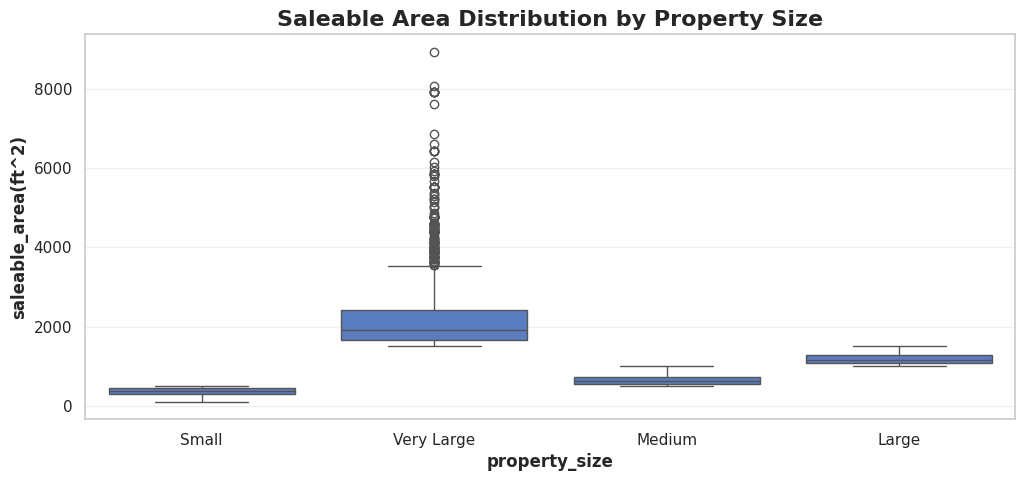

In [23]:
# Boxplot to show distribution of 'saleable_area(ft^2)' by 'property_size'
plt.figure(figsize=(12, 5))
sns.boxplot(x='property_size', y='saleable_area(ft^2)', data=merged_dataset)
plt.title('Saleable Area Distribution by Property Size', size=16)
plt.show()


### Scatterplot with Multiple Variables

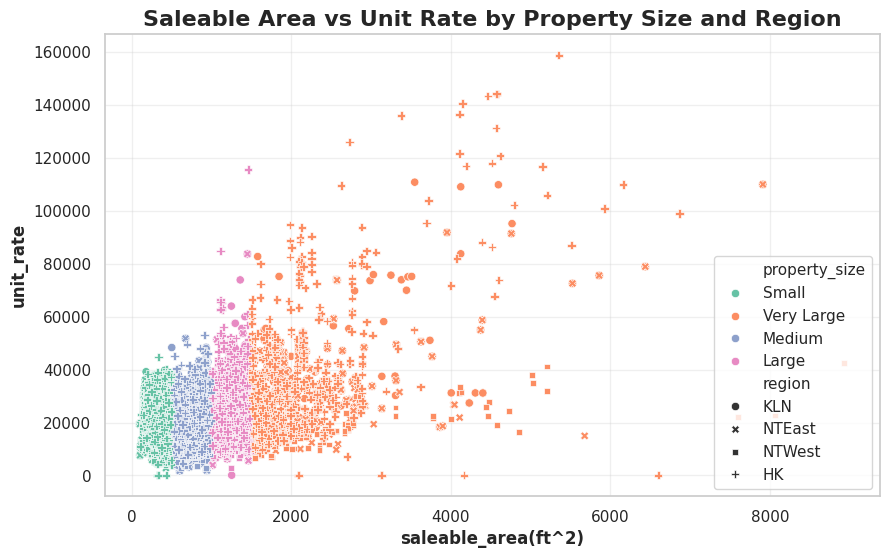

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='saleable_area(ft^2)', y='unit_rate', hue='property_size', data=merged_dataset, palette='Set2', style='region')
plt.title('Saleable Area vs Unit Rate by Property Size and Region', size=16)
plt.show()

### FacetGrid for Comparison by Region


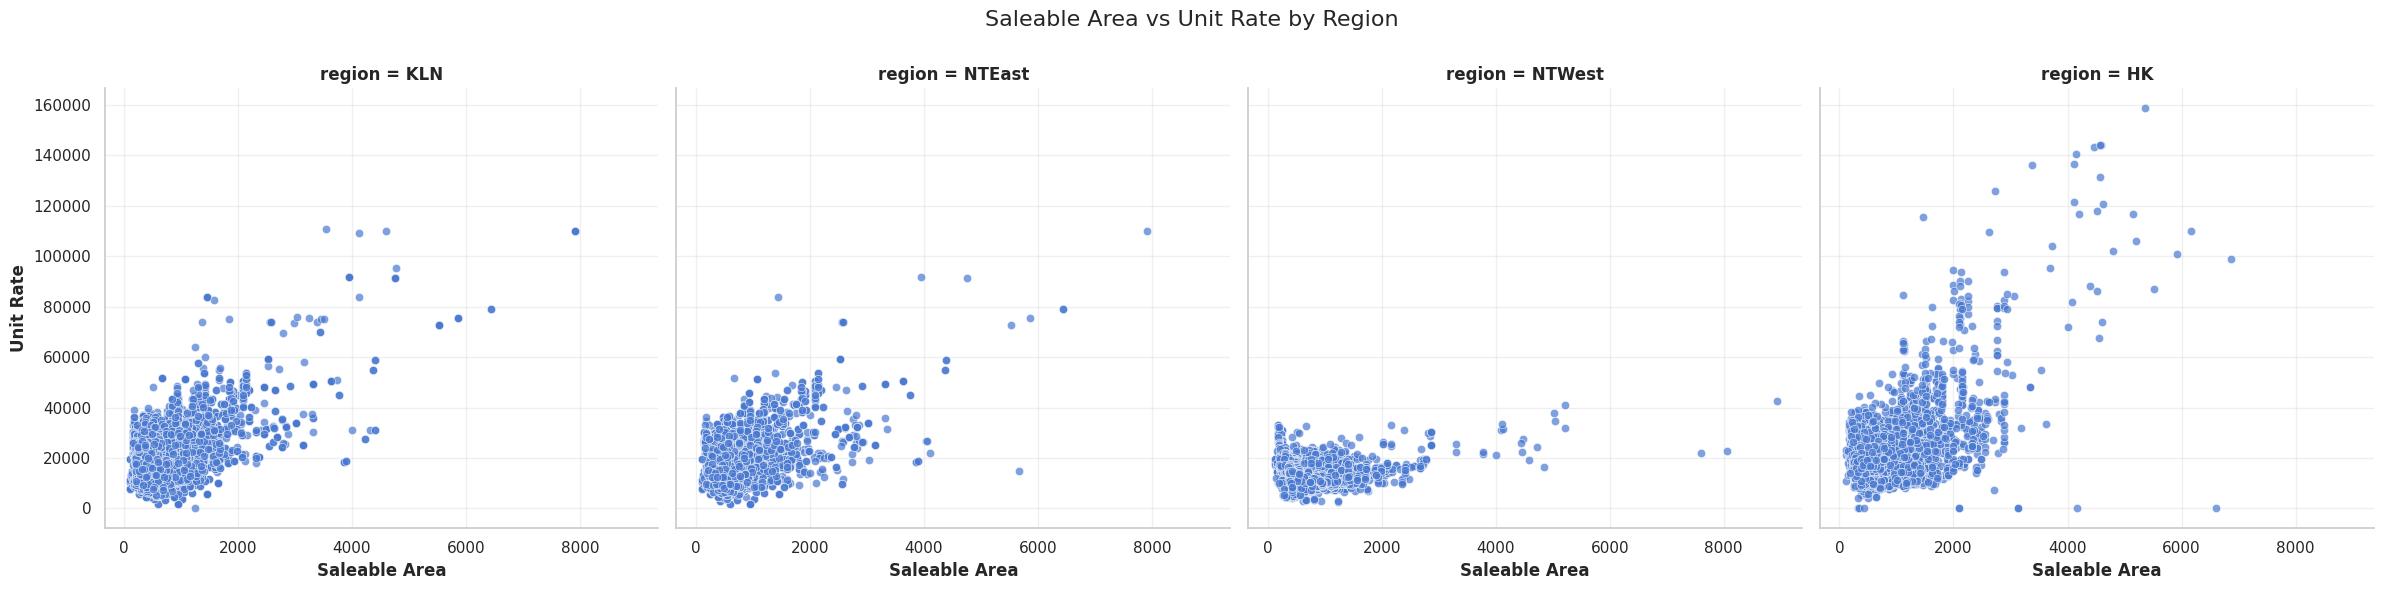

In [25]:
g = sns.FacetGrid(merged_dataset, col="region", height=6)
g.map(sns.scatterplot, "saleable_area(ft^2)", "unit_rate", alpha=.7)
g.set_axis_labels("Saleable Area", "Unit Rate")
plt.suptitle("Saleable Area vs Unit Rate by Region", size=16)
plt.subplots_adjust(top=0.85)
plt.show()


### 3D Scatter Plot

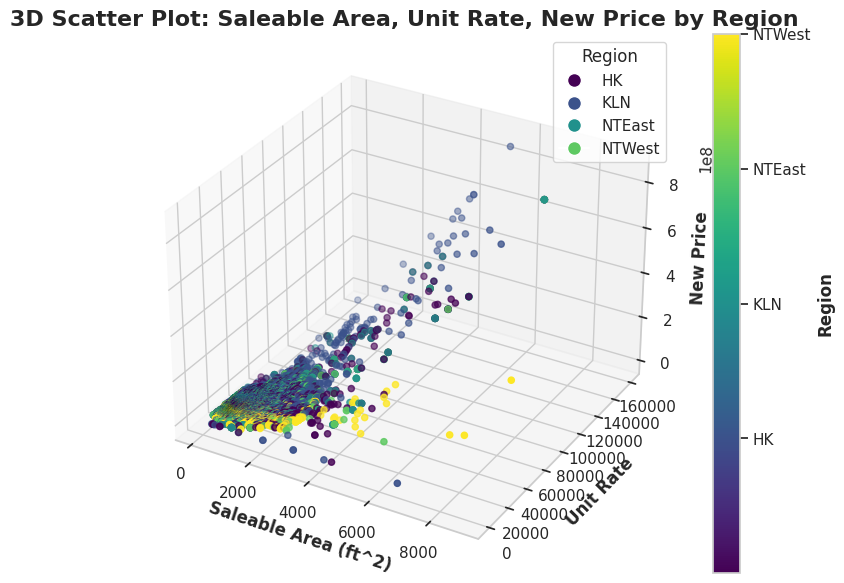

In [26]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert 'region' to categorical and map categories to colors
merged_dataset['region_cat'] = pd.Categorical(merged_dataset['region'])
merged_dataset['region_color'] = merged_dataset['region_cat'].cat.codes

# Prepare 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with region_color for coloring
scatter = ax.scatter(merged_dataset['saleable_area(ft^2)'], merged_dataset['unit_rate'], merged_dataset['new_price'],
                     c=merged_dataset['region_color'], cmap='viridis')

# Labels and Title
ax.set_xlabel('Saleable Area (ft^2)')
ax.set_ylabel('Unit Rate')
ax.set_zlabel('New Price')
plt.title("3D Scatter Plot: Saleable Area, Unit Rate, New Price by Region", size=16)

# Add color bar for categorical region
colorbar = plt.colorbar(scatter, ax=ax, label='Region')
colorbar.set_ticks([0, 1, 2, 3])  # Set appropriate ticks based on unique region categories
colorbar.set_ticklabels(merged_dataset['region_cat'].cat.categories)  # Label ticks with region names

# Add a legend
region_labels = merged_dataset['region_cat'].cat.categories
region_colors = [scatter.cmap(i / float(len(region_labels))) for i in range(len(region_labels))]

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in region_colors]

# Create legend with region names
ax.legend(handles, region_labels, title="Region", loc="best")

plt.show()


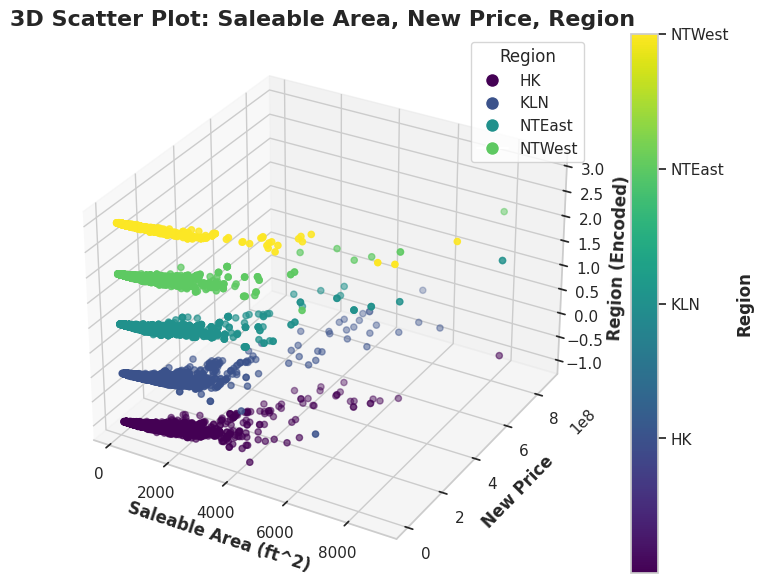

In [27]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert 'region' to categorical and map categories to colors
merged_dataset['region_cat'] = pd.Categorical(merged_dataset['region'])
merged_dataset['region_color'] = merged_dataset['region_cat'].cat.codes

# Prepare 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with region_color for coloring
scatter = ax.scatter(
    merged_dataset['saleable_area(ft^2)'],
    merged_dataset['new_price'],
    merged_dataset['region_color'],  # Use region_color as the Z-axis
    c=merged_dataset['region_color'],
    cmap='viridis'
)

# Labels and Title
ax.set_xlabel('Saleable Area (ft^2)')
ax.set_ylabel('New Price')
ax.set_zlabel('Region (Encoded)')
plt.title("3D Scatter Plot: Saleable Area, New Price, Region", size=16)

# Add color bar for categorical region
colorbar = plt.colorbar(scatter, ax=ax, label='Region')
colorbar.set_ticks(range(len(merged_dataset['region_cat'].cat.categories)))  # Set appropriate ticks for each region
colorbar.set_ticklabels(merged_dataset['region_cat'].cat.categories)  # Label ticks with region names

# Add a legend
region_labels = merged_dataset['region_cat'].cat.categories
region_colors = [scatter.cmap(i / float(len(region_labels))) for i in range(len(region_labels))]

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in region_colors]

# Create legend with region names
ax.legend(handles, region_labels, title="Region", loc="best")

plt.show()

## Save the Dataframe

In [31]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 67 columns):
 #   Column                                          Non-Null Count   Dtype   
---  ------                                          --------------   -----   
 0   saleable_area(ft^2)                             109851 non-null  int64   
 1   unit_rate                                       109851 non-null  int64   
 2   district                                        109851 non-null  object  
 3   floor                                           109851 non-null  float64 
 4   FormattedDate                                   109851 non-null  object  
 5   YearQuarter                                     109851 non-null  object  
 6   CG                                              109851 non-null  float64 
 7   CI                                              109851 non-null  float64 
 8   CPI                                             109851 non-null  float64 
 9   GDP            

In [32]:
# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv3.csv', index=False)

In [33]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Merged_Datasetv3.csv'

# Save the file
merged_dataset.to_csv(file_path, index=False)

# Verify if the file exists
if os.path.exists(file_path):
    print(f"File 'Merged_Datasetv3.csv' has been saved successfully!")
    print(f"Full file path: {file_path}")
else:
    print(f"File 'Merged_Datasetv3.csv' was not found in the directory!")

# Optionally unmount and remount Google Drive
drive.flush_and_unmount()
print("Drive unmounted. Please refresh Google Drive and remount if necessary.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'Merged_Datasetv3.csv' has been saved successfully!
Full file path: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/Merged_Datasetv3.csv
Drive unmounted. Please refresh Google Drive and remount if necessary.
